# CIFAR image classification using Convolutional Neural Network (CNN)

In [1]:
# imorting the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.regularizers import l2

In [3]:
# loading the data
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
# checking the shape of the data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [5]:
print(len(np.unique(y_train)))  # finding the number of output node

10


In [6]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

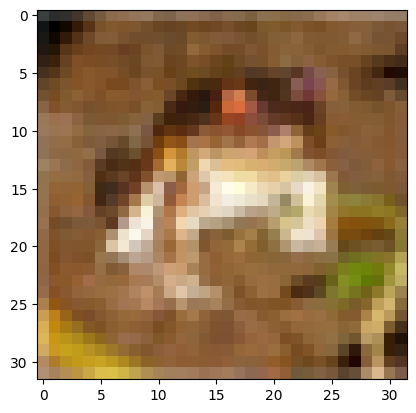

In [8]:
plt.imshow(X_train[0])

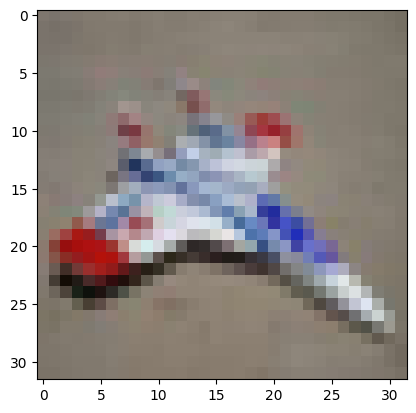

In [9]:
plt.imshow(X_train[30])

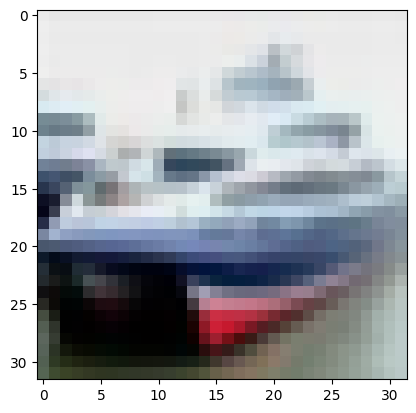

In [10]:
plt.imshow(X_test[1])

In [11]:
# normalizing the data
X_train = X_train/255.0
X_test = X_test/255.0

In [12]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [13]:
# Applying One-Hot-Encoder
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [14]:
model = Sequential()

In [15]:
# CNN - model building

In [16]:

# 1st CNN Layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

# 2nd CNN Layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))  # Activation after Batch Normalization
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))

# 3rd CNN Layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))  # Activation after Batch Normalization
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

# 4th CNN Layer
model.add(Conv2D(32, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))  # Activation after Batch Normalization
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))

# Flatten Layer
model.add(Flatten())

# ANN Layer
"""model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='softmax', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))"""

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='softmax'))
model.add(Dropout(0.2))

# Output ANN Layer
model.add(Dense(10, activation='softmax'))  # Softmax for multi-class classification


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 4, 4, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,410 (134.41 KB)

 Trainable params: 34,282 (133.91 KB)

 Non-trainable params: 128 (512.00 B)

In [18]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])


In [19]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test,y_test),batch_size=120)

Epoch 1/100
417/417 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.1902 - loss: 2.1980 - val_accuracy: 0.2458 - val_loss: 2.0261
Epoch 2/100
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2718 - loss: 1.9638 - val_accuracy: 0.3316 - val_loss: 1.8383
Epoch 3/100
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3033 - loss: 1.8338 - val_accuracy: 0.3462 - val_loss: 1.7791
Epoch 4/100
417/417 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.3191 - loss: 1.7392 - val_accuracy: 0.3873 - val_loss: 1.6423
Epoch 5/100
417/417 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3616 - loss: 1.6602 - val_accuracy: 0.3465 - val_loss: 1.8189
Epoch 6/100
417/417 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4092 - loss: 1.5757 - val_accuracy: 0.4226 - val_loss: 1.5397
Epoch 7/100
417/417 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4267 - loss: 1.5132 - val_accuracy: 0.4523 - val_loss: 1.4803
Epoch 8/100
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4442 - loss: 1.4737 - val_ac

In [20]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [21]:
#print(f"y_test shape is {y_test.shape}")
#print(f"y_pred shape is {y_pred.shape}")

In [22]:
'''
y_test_classes = np.argmax(y_test, axis=1)

y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test_classes, y_pred_classes)

print("Accuracy:", accuracy)'''

'\ny_test_classes = np.argmax(y_test, axis=1)\n\ny_pred_classes = np.argmax(y_pred, axis=1)\n\naccuracy = accuracy_score(y_test_classes, y_pred_classes)\n\nprint("Accuracy:", accuracy)'

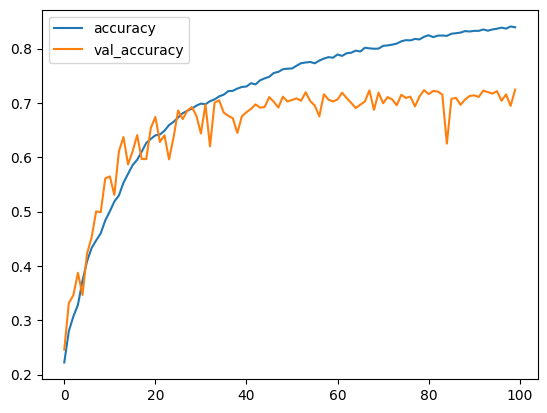

In [23]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()

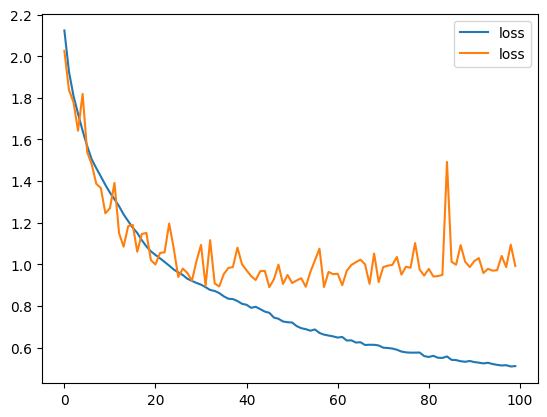

In [24]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='loss')
plt.legend()
plt.show()

In [24]:
"""
use
- regularization
-  batch normalization
- change the activation function for getting the best accuracy score with less overfitting !!!
"""